In [1]:
!curl -o "data/spa-eng.zip" "http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 2576k    0 15807    0     0  79396      0  0:00:33 --:--:--  0:00:33 80238
100 2576k  100 2576k    0     0  2789k      0 --:--:-- --:--:-- --:--:-- 2794k


In [33]:
from transformers import pipeline

"""
BLEU (Bilingual Evaluation Understudy) score è un punteggio che valuta la traduzione di testi
Queste traduzioni sono valutate sui possibili n-grammi che vengono generati, cercando di capire quanto spesso appaiano
nel linguaggio naturale.
E' il punteggio che meglio correla con il giudizio umano
"""
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
# Il tokenizer ci serve ad eliminare la punteggiatura. Ci serve per la valutazione del BLEU score che lavora sui token.
# il regex pattern associato serve a prendere uno o più caratteri alfanumerici (word characters)
from nltk.tokenize import RegexpTokenizer

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Creiamo un dizionario di parole.
# Il file contiene in ogni riga una coppia di parole inglese-spagnolo separate da un tab
# Il dizionario conterrà un insieme di parole inglesi con le possibili traduzioni in spagnolo

eng2spa = {}
for line in open("data/spa-eng.txt", encoding='utf-8'):
    line = line.rstrip()
    eng, spa = line.split("\t")
    if eng not in eng2spa:
        eng2spa[eng] = []
    eng2spa[eng].append(spa)

In [4]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [6]:
tokenizer = RegexpTokenizer(r"\w+")

In [7]:
# Ad esempio:
tokenizer.tokenize('¿Qué me cuentas?'.lower())

['qué', 'me', 'cuentas']

In [8]:
tokens = tokenizer.tokenize('¿Qué me cuentas?'.lower())
# il primo argomento di sentence_bleu è una lista di traduzioni possibili 
# (in questo caso è composta dalla nostra traduzione) 
# il secondo output, invece, dovrà essere l'output del modello
sentence_bleu([tokens], tokens)

C:\Users\Emilio Cimino\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.2213386697554703e-77

In [9]:
sentence_bleu([['hi']], ['hi'])

C:\Users\Emilio Cimino\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\Emilio Cimino\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.821831989445342e-231

In [10]:
smoother = SmoothingFunction()
sentence_bleu([['hi']], ['hi'], smoothing_function=smoother.method4)

1.0

In [11]:
sentence_bleu([[1,2,3,4]], [1,2,3,4])

1.0

In [12]:
# Adesso creiamo un dizionario di tokens a partire dal precedente:
eng2spa_tokens = {}
for eng, spa_list in eng2spa.items():
    spa_list_tokens = []
    for text in spa_list:
        tokens = tokenizer.tokenize(text.lower())
        spa_list_tokens.append(tokens)
    eng2spa_tokens[eng] = spa_list_tokens

In [13]:
from transformers import pipeline
# Per questo modello serve sentencepiece
translator = pipeline("translation",  model='Helsinki-NLP/opus-mt-en-es', device=0)

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

C:\Users\Emilio Cimino\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Emilio Cimino\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-en-es. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

C:\Users\Emilio Cimino\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [20]:
translator("Let's go, Mauricio")

[{'translation_text': 'Vamos, Mauricio.'}]

In [28]:
# retrieve each english sentence
eng_phrases = list(eng2spa.keys())
eng_phrases_subset = eng_phrases[20000:21000]

In [29]:
translations = translator(eng_phrases_subset)

In [30]:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [69]:
scores = []
for eng, pred in zip(eng_phrases_subset, translations):
    matches = eng2spa_tokens[eng]
    
    # Tokenizziamo la traduzione corrente
    spa_pred = tokenizer.tokenize(pred["translation_text"].lower())
    
    score = sentence_bleu(matches, spa_pred, smoothing_function=smoother.method2)
    scores.append(score)

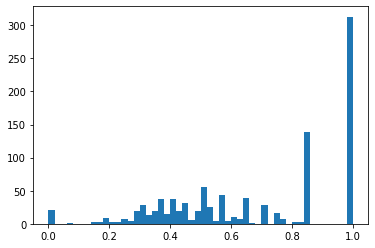

In [70]:
plt.hist(scores, bins=50);

In [71]:
np.mean(scores)

0.6833882736339093

In [76]:
np.random.seed(1)

def print_random_translation():
    i = np.random.choice(len(eng_phrases_subset))
    eng = eng_phrases_subset[i]
    
    print("EN:", eng)
    
    translation = translations[i]['translation_text']
    print("ES Translation:", translation)
    
    matches = eng2spa[eng]
    print("ES Matches:", matches)

In [77]:
print_random_translation()

EN: Tom isn't that young.
ES Translation: Tom no es tan joven.
ES Matches: ['Tom no es tan joven.']


In [78]:
print_random_translation()

EN: Tom's Mary's brother.
ES Translation: Tom es el hermano de Mary.
ES Matches: ['Tom es el hermano de Mary.']


In [79]:
print_random_translation()

EN: Can you describe them?
ES Translation: ¿Puede describirlos?
ES Matches: ['¿Podrías describirles?', '¿Podrías describirlos?']


In [84]:
print_random_translation()

EN: Would Tom lie to you?
ES Translation: ¿Tom te mentiría?
ES Matches: ['¿Te mentiría Tom?']
